### <font color='red'> Buzz Prediction on Twitter (Regression Part II)

This is a continuation of the Regression Task and the objectives are as below:
- Applied previous two models bagging and two models with pasting.
- Applied previous two models with adaboost boosting
- Applied one model with gradient bossting
- Applied PCA on the data and then applied all the previous models again on top of this. 
- Compared the results of PCA with the previous models
- Applied a deep learning model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('Twitter.data', header = None)

In [3]:
data.columns = ['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6',
               'AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3',
                'BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1',
               'AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6',
               'AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0',
               'ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Target']

In [12]:
data.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Target
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [13]:
data.shape

(583250, 78)

In [14]:
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Target
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583250 entries, 0 to 583249
Data columns (total 78 columns):
NCD_0        583250 non-null int64
NCD_1        583250 non-null int64
NCD_2        583250 non-null int64
NCD_3        583250 non-null int64
NCD_4        583250 non-null int64
NCD_5        583250 non-null int64
NCD_6        583250 non-null int64
AI_0         583250 non-null int64
AI_1         583250 non-null int64
AI_2         583250 non-null int64
AI_3         583250 non-null int64
AI_4         583250 non-null int64
AI_5         583250 non-null int64
AI_6         583250 non-null int64
AS(NA)_0     583250 non-null float64
AS(NA)_1     583250 non-null float64
AS(NA)_2     583250 non-null float64
AS(NA)_3     583250 non-null float64
AS(NA)_4     583250 non-null float64
AS(NA)_5     583250 non-null float64
AS(NA)_6     583250 non-null float64
BL_0         583250 non-null float64
BL_1         583250 non-null float64
BL_2         583250 non-null float64
BL_3         583250 non-null 

In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

In [5]:
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data, sample_target, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Regression Models:

### 1. Bagging

In [20]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(3)
bag_reg1 = BaggingRegressor(knn_reg, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

In [21]:
bag_reg1.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [22]:
print('Train score: {:.2f}'.format(bag_reg1.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg1.score(X_test, y_test)))

Train score: 0.54
Test score: 0.50


In [154]:
report_table = [['KNN Regressor with Bagging', 'K = 3', bag_reg1.score(X_train, y_train), bag_reg1.score(X_test, y_test)]]

In [23]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
bag_reg2 = BaggingRegressor(linear_reg, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

In [25]:
bag_reg2.fit(X_train, y_train)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [26]:
print('Train score: {:.2f}'.format(bag_reg2.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg2.score(X_test, y_test)))

Train score: 0.92
Test score: 0.91


In [155]:
report_table = report_table + [['Linear Regression with Bagging', '-', bag_reg2.score(X_train, y_train), bag_reg2.score(X_test, y_test)]]

### 2. Pasting

In [27]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(3)
paste_reg1 = BaggingRegressor(knn_reg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

In [28]:
paste_reg1.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [29]:
print('Train score: {:.2f}'.format(paste_reg1.score(X_train, y_train)))
print('Test score: {:.2f}'.format(paste_reg1.score(X_test, y_test)))

Train score: 0.54
Test score: 0.50


In [156]:
report_table = report_table + [['KNN Regressor with Pasting', 'K = 3', paste_reg1.score(X_train, y_train), paste_reg1.score(X_test, y_test)]]

In [30]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
paste_reg2 = BaggingRegressor(linear_reg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

In [31]:
paste_reg2.fit(X_train, y_train)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [32]:
print('Train score: {:.2f}'.format(paste_reg2.score(X_train, y_train)))
print('Test score: {:.2f}'.format(paste_reg2.score(X_test, y_test)))

Train score: 0.92
Test score: 0.91


In [157]:
report_table = report_table + [['Linear Regression with Pasting', '-', paste_reg2.score(X_train, y_train), paste_reg2.score(X_test, y_test)]]

### 3. AdaBoost

In [132]:
from sklearn.model_selection import train_test_split
_, sample_data_10, _, sample_target_10 = train_test_split(X, y, shuffle = True, test_size = 0.01)

In [133]:
X_train_10_org, X_test_10_org, y_train_10, y_test_10 = train_test_split(sample_data_10, sample_target_10, random_state = 0)

scaler = MinMaxScaler()
X_train_10 = scaler.fit_transform(X_train_10_org)
X_test_10 = scaler.transform(X_test_10_org)

In [135]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg1 = AdaBoostRegressor(KNeighborsRegressor(3), n_estimators=200, learning_rate=0.5, random_state=0)
ada_reg1.fit(X_train_10, y_train_10)

AdaBoostRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform'),
         learning_rate=0.5, loss='linear', n_estimators=200,
         random_state=0)

In [136]:
print('Train score: {:.2f}'.format(ada_reg1.score(X_train_10, y_train_10)))
print('Test score: {:.2f}'.format(ada_reg1.score(X_test_10, y_test_10)))

Train score: 1.00
Test score: 0.72


In [158]:
report_table = report_table + [['Ada Boost with KNN', 'K = 3', ada_reg1.score(X_train_10, y_train_10), ada_reg1.score(X_test_10, y_test_10)]]

In [138]:
ada_reg2 = AdaBoostRegressor(LinearRegression(), n_estimators=200, learning_rate=0.5, random_state=0)
ada_reg2.fit(X_train_10, y_train_10)

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
         learning_rate=0.5, loss='linear', n_estimators=200,
         random_state=0)

In [139]:
print('Train score: {:.2f}'.format(ada_reg2.score(X_train_10, y_train_10)))
print('Test score: {:.2f}'.format(ada_reg2.score(X_test_10, y_test_10)))

Train score: 0.93
Test score: 0.88


In [160]:
report_table = report_table + [['Ada Boost with Linear Regression', '-', ada_reg2.score(X_train_10, y_train_10), ada_reg2.score(X_test_10, y_test_10)]]

### 4. Gradient Boosting

In [143]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [144]:
print('Train score: {:.2f}'.format(gbrt.score(X_train, y_train)))
print('Test score: {:.2f}'.format(gbrt.score(X_test, y_test)))

Train score: 0.89
Test score: 0.86


In [161]:
report_table = report_table + [['Gradient Boosting', '-', gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)]]

In [162]:
report_table

[['KNN Regressor with Bagging',
  'K = 3',
  0.5368388769586379,
  0.5021941614291023],
 ['Linear Regression with Bagging',
  '-',
  0.9197651606935351,
  0.9146543026093072],
 ['KNN Regressor with Pasting',
  'K = 3',
  0.5369001677499385,
  0.502260885252289],
 ['Linear Regression with Pasting',
  '-',
  0.9179092649255198,
  0.9134963164471642],
 ['Ada Boost with KNN', 'K = 3', 0.9994849697195989, 0.7156440652103654],
 ['Ada Boost with Linear Regression',
  '-',
  0.9348664979902501,
  0.8757401037298926],
 ['Gradient Boosting', '-', 0.8935838961631928, 0.8632794390302264]]

### 5. Models using PCA

In [67]:
from sklearn.decomposition import PCA

In [68]:
pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.98) + 1

In [69]:
d

8

In [70]:
pca = PCA(n_components = 8)
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test = pca.fit_transform(X_test)

In [71]:
knn_reg_pca = KNeighborsRegressor(5)
knn_reg_pca.fit(X_reduced_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [72]:
print('Train score: {:.2f}'.format(knn_reg_pca.score(X_reduced_train, y_train)))
print('Test score: {:.2f}'.format(knn_reg_pca.score(X_reduced_test, y_test)))

Train score: 0.91
Test score: 0.81


In [112]:
pca_report_table = [['PCA on KNN Regressor', 'K= 5', knn_reg_pca.score(X_reduced_train, y_train), knn_reg_pca.score(X_reduced_test, y_test)]]

In [74]:
linear_reg_pca = LinearRegression()
linear_reg_pca.fit(X_reduced_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
print('Train score: {:.2f}'.format(linear_reg_pca.score(X_reduced_train, y_train)))
print('Test score: {:.2f}'.format(linear_reg_pca.score(X_reduced_test, y_test)))

Train score: 0.88
Test score: 0.83


In [113]:
pca_report_table = pca_report_table + [['PCA on Linear Regression', '-', linear_reg_pca.score(X_reduced_train, y_train), linear_reg_pca.score(X_reduced_test, y_test)]]

In [79]:
from sklearn.linear_model import SGDRegressor
sgd_pca = SGDRegressor(learning_rate = 'optimal', max_iter = 10000, penalty = 'l2',random_state = 0)
sgd_pca.fit(X_reduced_train, y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='squared_loss', max_iter=10000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=0, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [80]:
print('Train score: {:.2f}'.format(sgd_pca.score(X_reduced_train, y_train)))
print('Test score: {:.2f}'.format(sgd_pca.score(X_reduced_test, y_test)))

Train score: 0.88
Test score: 0.83


In [114]:
pca_report_table = pca_report_table + [['PCA on SGD Regression', 'max_iter = 10000 and penalty = l2', sgd_pca.score(X_reduced_train, y_train), sgd_pca.score(X_reduced_test, y_test)]]

In [82]:
from  sklearn.linear_model import Ridge

ridge_pca = Ridge(alpha = 0.01, random_state = 0)
ridge_pca.fit(X_reduced_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001)

In [83]:
print('Train score: {:.2f}'.format(ridge_pca.score(X_reduced_train, y_train)))
print('Test score: {:.2f}'.format(ridge_pca.score(X_reduced_test, y_test)))

Train score: 0.88
Test score: 0.83


In [115]:
pca_report_table = pca_report_table + [['PCA on Ridge Regression', 'alpha = 0.01', ridge_pca.score(X_reduced_train, y_train), ridge_pca.score(X_reduced_test, y_test)]]

In [85]:
from  sklearn.linear_model import Lasso

lasso_pca = Lasso(alpha = 0.01, random_state = 0)
lasso_pca.fit(X_reduced_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
print('Train score: {:.2f}'.format(lasso_pca.score(X_reduced_train, y_train)))
print('Test score: {:.2f}'.format(lasso_pca.score(X_reduced_test, y_test)))

Train score: 0.88
Test score: 0.83


In [116]:
pca_report_table = pca_report_table + [['PCA on Lasso Regression', 'alpha = 0.01', lasso_pca.score(X_reduced_train, y_train), lasso_pca.score(X_reduced_test, y_test)]]

In [88]:
from sklearn.svm import SVR

svr_linear_pca = SVR(kernel = 'linear', C = 10) 
svr_linear_pca.fit(X_reduced_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [89]:
print('Train score: {:.2f}'.format(svr_linear_pca.score(X_reduced_train, y_train)))
print('Test score: {:.2f}'.format(svr_linear_pca.score(X_reduced_test, y_test)))

Train score: 0.85
Test score: 0.80


In [117]:
pca_report_table = pca_report_table + [['PCA on Linear SVR', 'C = 10', svr_linear_pca.score(X_reduced_train, y_train), svr_linear_pca.score(X_reduced_test, y_test)]]

In [91]:
svr_rbf_pca = SVR(kernel = 'rbf', C = 10, gamma = 0.01)
svr_rbf_pca.fit(X_reduced_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [92]:
print('Train score: {:.2f}'.format(svr_rbf_pca.score(X_reduced_train, y_train)))
print('Test score: {:.2f}'.format(svr_rbf_pca.score(X_reduced_test, y_test)))

Train score: 0.18
Test score: 0.16


In [118]:
pca_report_table = pca_report_table + [['PCA on RBF SVR', 'C = 10 and gamma = 0.01', svr_rbf_pca.score(X_reduced_train, y_train), svr_rbf_pca.score(X_reduced_test, y_test)]]

In [94]:
svr_poly_pca = SVR(degree = 3, C = 10)
svr_poly_pca.fit(X_reduced_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [95]:
print('Train score: {:.2f}'.format(svr_poly_pca.score(X_reduced_train, y_train)))
print('Test score: {:.2f}'.format(svr_poly_pca.score(X_reduced_test, y_test)))

Train score: 0.65
Test score: 0.60


In [119]:
pca_report_table = pca_report_table + [['PCA on Poly SVR', 'C = 10', svr_poly_pca.score(X_reduced_train, y_train), svr_poly_pca.score(X_reduced_test, y_test)]]

In [120]:
pca_report_table

[['PCA on KNN Regressor', 'K= 5', 0.9108550644288013, 0.8099988688093788],
 ['PCA on Linear Regression', '-', 0.8812008966937751, 0.8334947908279939],
 ['PCA on SGD Regression',
  'max_iter = 10000 and penalty = l2',
  0.8811870739521482,
  0.8332734387805638],
 ['PCA on Ridge Regression',
  'alpha = 0.01',
  0.8812008966226625,
  0.8334943300306239],
 ['PCA on Lasso Regression',
  'alpha = 0.01',
  0.8812008602713693,
  0.8335024784065208],
 ['PCA on Linear SVR', 'C = 10', 0.8534043308219768, 0.7997601508493349],
 ['PCA on RBF SVR',
  'C = 10 and gamma = 0.01',
  0.17507438167339062,
  0.1579639029127008],
 ['PCA on Poly SVR', 'C = 10', 0.646266115538918, 0.5962171082869866]]

In [121]:
pca_report = pd.DataFrame(pca_report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy'])
pca_report.index = pca_report['Model name']
pca_report

,Model name,Model parameter,Train accuracy,Test accuracy
Model name,,,,
PCA on KNN Regressor,PCA on KNN Regressor,K= 5,0.910855,0.809999
PCA on Linear Regression,PCA on Linear Regression,-,0.881201,0.833495
PCA on SGD Regression,PCA on SGD Regression,max_iter = 10000 and penalty = l2,0.881187,0.833273
PCA on Ridge Regression,PCA on Ridge Regression,alpha = 0.01,0.881201,0.833494
PCA on Lasso Regression,PCA on Lasso Regression,alpha = 0.01,0.881201,0.833502
PCA on Linear SVR,PCA on Linear SVR,C = 10,0.853404,0.799760
PCA on RBF SVR,PCA on RBF SVR,C = 10 and gamma = 0.01,0.175074,0.157964
PCA on Poly SVR,PCA on Poly SVR,C = 10,0.646266,0.596217


Below are the results from project 2:

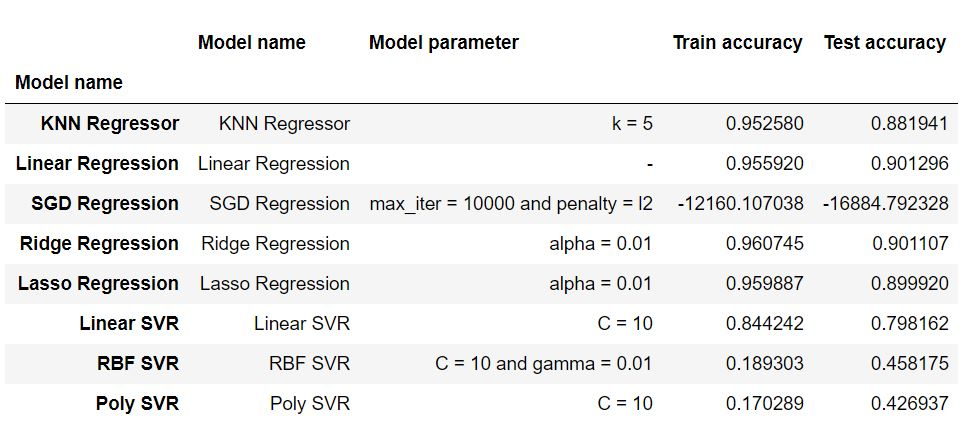

In [111]:
from IPython.display import Image
Image(filename = 'project2_results.jpg', width = 700, height = 700)

Based on above results, it seems that PCA doesn't help in improving the results of the models. A plausible reason can be that by using PCA we are losing information. The components of PCA are not able to explain the required variance which all the original features togehter can.

### 6. Neual Network

In [6]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [7]:
# create model, simple perceptron 
model = Sequential()
model.add(Dense(55, input_dim=77, kernel_initializer='normal', activation='relu'))
model.add(Dense(30, kernel_initializer='normal', activation='relu'))
model.add(Dense(15, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [8]:
model.compile(loss='mse', optimizer='adam' , metrics = ['mse'])

In [9]:
model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
43743/43743 [==============================] - 3s 62us/step - loss: 150273.0535 - mean_squared_error: 150273.0535
Epoch 2/100
43743/43743 [==============================] - 3s 62us/step - loss: 44375.2820 - mean_squared_error: 44375.2820
Epoch 3/100
43743/43743 [==============================] - 3s 59us/step - loss: 40203.1331 - mean_squared_error: 40203.1331
Epoch 4/100
43743/43743 [==============================] - 2s 53us/step - loss: 37749.1559 - mean_squared_error: 37749.1559
Epoch 5/100
43743/43743 [==============================] - 2s 54us/step - loss: 34875.7829 - mean_squared_error: 34875.7829
Epoch 6/100
43743/43743 [==============================] - 3s 67us/step - loss: 33208.1975 - mean_squared_error: 33208.1975
Epoch 7/100
43743/43743 [==============================] - 3s 74us/step - loss: 32591.8371 - mean_squared_error: 32591.8371
Epoch 8/100
43743/43743 [==============================] - 3s 72us/step - loss: 31542.8543 - mean_squared_error: 31542.8543
Epoch 

In [11]:
model.evaluate(X_train, y_train)

43743/43743 [==============================] - 1s 15us/step


[19289.43139221472, 19289.43139221472]

In [12]:
from sklearn.metrics import r2_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: 0.94
Test score: 0.96
